In [15]:
!pip install xgboost -q

In [16]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [17]:
# import the data
df = sns.load_dataset('diamonds')

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [19]:
# split the data into X and y
X = df.drop('cut', axis=1)
y = df['cut']

# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7161661104931405
Precision score:  0.7161661104931405
Recall score:  0.7161661104931405
F1 score:  0.7161661104931405
CPU times: total: 484 ms
Wall time: 1.19 s


In [21]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7868001483129403
Precision score:  0.7868001483129403
Recall score:  0.7868001483129403
F1 score:  0.7868001483129403
CPU times: total: 16 s
Wall time: 23 s


In [22]:
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))



Accuracy score:  0.7968112717834631
Precision score:  0.7968112717834631
Recall score:  0.7968112717834631
F1 score:  0.7968112717834631


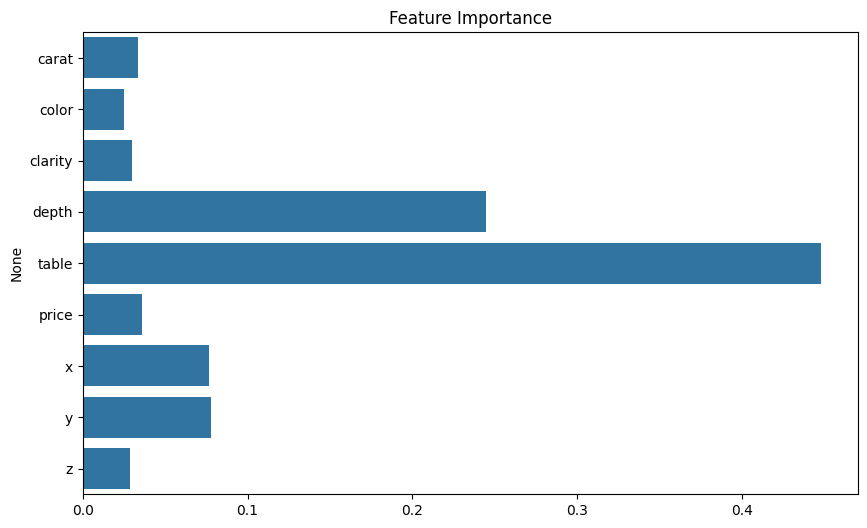

In [23]:
# plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb.feature_importances_, y=X.columns)
plt.title('Feature Importance')
plt.show()

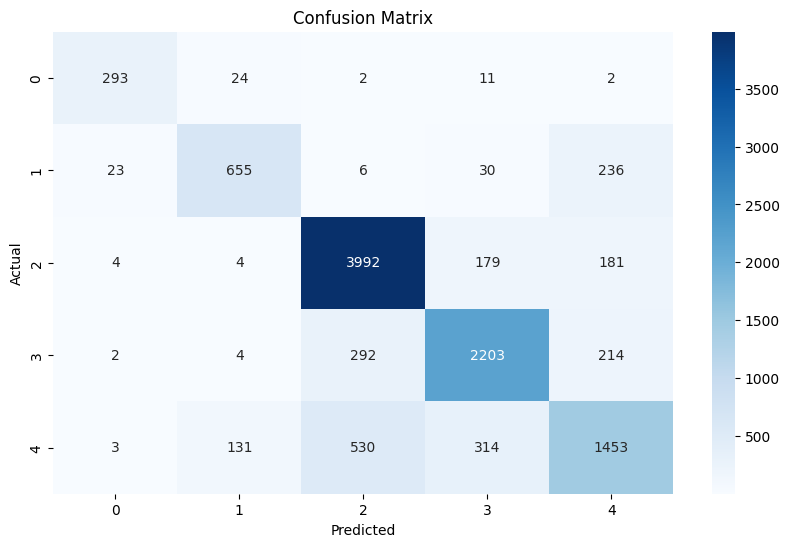

In [24]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()